# Project 1: SAT Analysis 

---
## Overview

The Scholastic Aptitude Test (SAT) is a standardized test taken by high school students with the intention of gauging college readiness. Many university admissions departments consider this test to be an integral factor of predicting success in college, and is still used as part of the admissions process. There has been a trend in recent years to advocate for dropping SAT testing as critics believe standardized tests are not a good measure of a student's potential. Many universities have chosen to forgo standardized testing in their admissions process as a result. Each state has its own regulations on SAT mandation. 

The SAT is comprised of two sections: Evidence-Based Reading and Writing and Mathematics. The minimum score for each section is 200 and the maximum score is 800. The total SAT score is the addition of both sections, and can range from 400-1600.[[1]](https://satsuite.collegeboard.org/sat/scores/understanding-scores)

---

## Problem Statement

A university executive board is looking to better understand which departments they should allocate scholarship and program funding to attract more prospective students. This project aims to identify which college majors are the most lucrative post graduation. 2017-2019 student SAT scores will be analyzed to determine which sections of the test are most relevant to these majors, and which states are scoring favorably in these areas over time, in an effort to provide recommendations on where to recruit.

The data used for this project are from the following sources: [Wall Street Journal](https://www.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html), [2019 SAT by College Major](http://localhost:8889/files/project_1/data/sat_2019_by_intended_college_major.csv?_xsrf=2%7C4a6b3cac%7Cfeba3ecee7ec64ff988cd860a0ed4f4c%7C1665416297), [2017 SAT by State](http://localhost:8889/files/project_1/data/sat_2017.csv?_xsrf=2%7C4a6b3cac%7Cfeba3ecee7ec64ff988cd860a0ed4f4c%7C1665416297), [2018 SAT by State](http://localhost:8889/files/project_1/data/sat_2018.csv?_xsrf=2%7C4a6b3cac%7Cfeba3ecee7ec64ff988cd860a0ed4f4c%7C1665416297), [2019 SAT by State](http://localhost:8889/files/project_1/data/sat_2019.csv?_xsrf=2%7C4a6b3cac%7Cfeba3ecee7ec64ff988cd860a0ed4f4c%7C1665416297)

---

## Contents:
- [Overview](#Overview)
- [Outside Research](#Outside-Research)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Outside Research

---

A student's decision on which university to attend is multifactorial and varies based what each university offers. For this reason, universities often have multiple tactics when marketing to prospective students. These marketing efforts are most successful when they align with the wants and needs of target student populations.[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7266786/) In more recent years, universities have made a push to be more inclusive, and recruit larger segments of the population, rather than mass-marketing.[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7266786/) SAT scores are still widely used as part of the admissions process, and there is increasing evidence showing potential bias toward race, parental income and education when implementing SAT scores.[[3]](https://journals.sagepub.com/doi/abs/10.3102/0013189x09351981) A study on trends between majors of students and incoming SAT scores shows that "helping faculty, administrators, and institutional advisory boards to adjust uneven expectations of SAT scores of incoming cohorts and existing major offerings (is important). This adjustment can allow for more realistic expectations of the impact of strategic plans, hiring decisions, institutional collaborations, marketing efforts (within and outside the walls of the educational institution), and resource allocations."[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7266786/)


## Data Import and Cleaning 
---
This section examines 2017-2019 SAT datasets and a dataset from the Wall Street Journal on "Degrees that Pay", shown through salary increase over career by college major. Raw data is often messy and needs to be cleaned before being suitable for Exploratory Data Analysis. The purpose of this section is to identify and fix any problems within the datasets.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing csv files
raw_sat17=pd.read_csv('../data/sat_2017.csv')
raw_sat18=pd.read_csv('../data/sat_2018.csv')
raw_sat19 = pd.read_csv('../data/sat_2019.csv')
raw_sat19_by_major=pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
raw_degrees_that_pay=pd.read_csv('../data/degrees-that-pay-back.csv')

#Viewing first 5 rows of data in each dataset
print(raw_sat17.head(5))
print(raw_sat18.head(5))
print(raw_sat19.head(5))
print(raw_sat19_by_major.head(5))
print(raw_degrees_that_pay.head(5))

#Viewing datatypes and non-null values 
print(raw_sat17.info())
print(raw_sat18.info())
print(raw_sat19.info())
print(raw_sat19_by_major.info())
print(raw_degrees_that_pay.info())

#Viewing shape
print(raw_sat17.shape)
print(raw_sat18.shape)
print(raw_sat19.shape)
print(raw_sat19_by_major.shape)
print(raw_degrees_that_pay.shape)

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
        State Participation Rate  EBRW  Math  Total
0     Alabama           

The 2017 and 2018 SAT datasets each contain 51 rows. The 2019 SAT dataset contains 53 rows. The columns for each dataset are State, Participation Rate, Evidence-Based Reading and Writing or EBRW, Math, and Total. There are an equal numbers of entries in each column and no missing values. The 'State' and 'Participation Rate' columns are object type while the score columns are integer type. Puerto Rico and the Virgin Islands have non-numeric values listed in the 'Participation Rate' column. 

The 2019 SAT by College Major dataset contains 38 rows. The columns are IntendedCollegeMajor, TestTakers, Percent, Total, ReadingWriting and Math. There are an equal number of entries in each column and no missing values. 'IntendedCollegeMajor', 'TestTakers' and 'Percent' are all object type and the rest are integer type. 

The Wall Street Journal dataset on Degrees that Pay by College Major over time contains 50 rows. The columns are Undergraduate Major, Starting Median Salary, Mid-Career Median Salary, Percent change from Starting to Mid-Career Salary, Mid-Career 10th Percentile Salary, Mid-Career 25th Percentile Salary, Mid-Career 75th Percentile Salary, Mid-Career 90th Percentile Salary. There are an equal number of entries in each column and no missing values. All columns are object type, except for 'Percent change from Starting to Mid-Career Salary', which is float type. 

Upon initial analysis, I will be changing all column titles to lowercase and modifying column titles to be more descriptive and uniform across datasets. I will be changing the 'Participation Rate' columns in the 2017-2019 SAT datasets, the 'Percent' column in the 2019 SAT by College Major dataset, and all columns with type object in the Degrees that Pay dataset to a float type, with the exception of 'Undergraduate Major' which will remain object type. I be dropping the rows in the 2019 SAT dataset containing data from Puerto Rico and the Virgin Islands as they contain non-numeric missing data and are not relevant to this project.

In [3]:
#Renaming 2017-2019 SAT Columns 

raw_sat17.rename(columns = {'State':'states', 'Participation':'2017_participation_rate', 
                            'Evidence-Based Reading and Writing':'2017_ebrw_score', 
                            'Math':'2017_math_score', 'Total':'2017_total_score'}, inplace=True)
print(raw_sat17.head(1))

raw_sat18.rename(columns = {'State':'states', 'Participation':'2018_participation_rate', 
                            'Evidence-Based Reading and Writing':'2018_ebrw_score', 
                            'Math':'2018_math_score', 'Total':'2018_total_score'}, inplace=True)
print(raw_sat18.head(1))

raw_sat19.rename(columns = {'State':'states', 'Participation Rate':'2019_participation_rate', 'EBRW':'2019_ebrw_score', 
                            'Math':'2019_math_score', 'Total':'2019_total_score'}, inplace=True)
print(raw_sat19.head(1))

    states 2017_participation_rate  2017_ebrw_score  2017_math_score  \
0  Alabama                      5%              593              572   

   2017_total_score  
0              1165  
    states 2018_participation_rate  2018_ebrw_score  2018_math_score  \
0  Alabama                      6%              595              571   

   2018_total_score  
0              1166  
    states 2019_participation_rate  2019_ebrw_score  2019_math_score  \
0  Alabama                      7%              583              560   

   2019_total_score  
0              1143  


In [4]:
#Renaming Raw SAT 19 by Major Columns 
raw_sat19_by_major.rename(columns = {'IntendedCollegeMajor':'intended_college_major', 'TestTakers':'num_test_takers', 
                                     'Percent':'total_percent', 'Total':'total_score', 'ReadingWriting':'ebrw_score', 
                                     'Math':'math_score'}, inplace=True)
raw_sat19_by_major.head(1)

,intended_college_major,num_test_takers,total_percent,total_score,ebrw_score,math_score
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481


In [5]:
#Renaming Raw Degrees that Pay Columns 
raw_degrees_that_pay.rename(columns={'Undergraduate Major':'undergraduate_major', 
                                     'Starting Median Salary':'starting_median_salary', 
                                     'Mid-Career Median Salary':'mid_career_median_salary', 
                                     'Percent change from Starting to Mid-Career Salary':'percent_delta_starting_to_mid_career', 
                                     'Mid-Career 10th Percentile Salary':'mid_career_10th_percentile', 
                                     'Mid-Career 25th Percentile Salary':'mid_career_25th_percentile', 
                                     'Mid-Career 75th Percentile Salary':'mid_career_75th_percentile', 
                                     'Mid-Career 90th Percentile Salary':'mid_career_90th_percentile'}, inplace=True)
raw_degrees_that_pay.head(1)

,undergraduate_major,starting_median_salary,mid_career_median_salary,percent_delta_starting_to_mid_career,mid_career_10th_percentile,mid_career_25th_percentile,mid_career_75th_percentile,mid_career_90th_percentile
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"


In [6]:
#Dropping Puerto Rico and Virgin Island rows on raw_sat19 and re-indexing to account for the dropped values 
raw_sat19.drop([39, 47], inplace=True)
raw_sat19.reset_index(drop=True, inplace=True)

In [7]:
#Changing 2017-2019 SAT data types as indicated above using Pandas 'astype' function appropriately 
raw_sat17['2017_participation_rate']=raw_sat17['2017_participation_rate'].str.rstrip('%').astype('float')/100.0
raw_sat18['2018_participation_rate']=raw_sat18['2018_participation_rate'].str.rstrip('%').astype('float')/100.0
raw_sat19['2019_participation_rate']=raw_sat19['2019_participation_rate'].str.rstrip('%').astype('float')/100.0

In [8]:
#Changing 2019 SAT by College Major data types as indicated above using Pandas 'astype' function appropriately 
raw_sat19_by_major['total_percent'] = raw_sat19_by_major['total_percent'].str.rstrip('%').astype('float')/100.0
raw_sat19_by_major['num_test_takers']=raw_sat19_by_major['num_test_takers'].str.replace(',', '').astype('int')

In [9]:
#Changing Degrees that Pay data types as indicated above using Pandas 'astype' function appropriately 
raw_degrees_that_pay['starting_median_salary']=raw_degrees_that_pay['starting_median_salary'].str.replace(',','').str.lstrip('$').astype('float')
raw_degrees_that_pay['mid_career_median_salary']=raw_degrees_that_pay['mid_career_median_salary'].str.replace(',','').str.lstrip('$').astype('float')
raw_degrees_that_pay['mid_career_10th_percentile']=raw_degrees_that_pay['mid_career_10th_percentile'].str.replace(',','').str.lstrip('$').astype('float')
raw_degrees_that_pay['mid_career_25th_percentile']=raw_degrees_that_pay['mid_career_25th_percentile'].str.replace(',','').str.lstrip('$').astype('float')
raw_degrees_that_pay['mid_career_75th_percentile']=raw_degrees_that_pay['mid_career_75th_percentile'].str.replace(',','').str.lstrip('$').astype('float')
raw_degrees_that_pay['mid_career_90th_percentile']=raw_degrees_that_pay['mid_career_90th_percentile'].str.replace(',','').str.lstrip('$').astype('float')

In [10]:
#Checking to see if the above data type conversions worked 
print(raw_sat17.head(2))
print(raw_sat18.head(2))
print(raw_sat19.head(2))
print(raw_sat19_by_major.head(2))
print(raw_degrees_that_pay.head(2))

    states  2017_participation_rate  2017_ebrw_score  2017_math_score  \
0  Alabama                     0.05              593              572   
1   Alaska                     0.38              547              533   

   2017_total_score  
0              1165  
1              1080  
    states  2018_participation_rate  2018_ebrw_score  2018_math_score  \
0  Alabama                     0.06              595              571   
1   Alaska                     0.43              562              544   

   2018_total_score  
0              1166  
1              1106  
    states  2019_participation_rate  2019_ebrw_score  2019_math_score  \
0  Alabama                     0.07              583              560   
1   Alaska                     0.41              556              541   

   2019_total_score  
0              1143  
1              1097  
                              intended_college_major  num_test_takers  \
0  Agriculture, AgricultureOperations, and Relate...            24913

In [11]:
#View summary statistics 
print(raw_sat17.describe())
print(raw_sat18.describe())
print(raw_sat19.describe())
print(raw_sat19_by_major.describe())
print(raw_degrees_that_pay.describe())

       2017_participation_rate  2017_ebrw_score  2017_math_score  \
count                51.000000        51.000000        51.000000   
mean                  0.398039       569.117647       547.627451   
std                   0.352766        45.666901        84.909119   
min                   0.020000       482.000000        52.000000   
25%                   0.040000       533.500000       522.000000   
50%                   0.380000       559.000000       548.000000   
75%                   0.660000       613.000000       599.000000   
max                   1.000000       644.000000       651.000000   

       2017_total_score  
count         51.000000  
mean        1126.098039  
std           92.494812  
min          950.000000  
25%         1055.500000  
50%         1107.000000  
75%         1212.000000  
max         1295.000000  
       2018_participation_rate  2018_ebrw_score  2018_math_score  \
count                51.000000        51.000000        51.000000   
mean             

In [12]:
#Check for duplicates to make sure each state or major is only referenced once 
print("No duplicates in SAT 17:", (raw_sat17.states.value_counts().values == 1).all())
print("No duplicates in SAT 18:", (raw_sat18.states.value_counts().values == 1).all())
print("No duplicates in SAT 19:", (raw_sat19.states.value_counts().values == 1).all())
print("No duplicates in SAT 19 by College Major:", (raw_sat19_by_major.intended_college_major.value_counts().values==1).all())
print("No duplicates in Degrees that Pay:", (raw_degrees_that_pay.undergraduate_major.value_counts().values==1).all())

No duplicates in SAT 17: True
No duplicates in SAT 18: True
No duplicates in SAT 19: True
No duplicates in SAT 19 by College Major: True
No duplicates in Degrees that Pay: True


In [13]:
#Change 2017 SAT math column with out of range value to mean value 
raw_sat17.loc[20,'2017_math_score'] = 548

Upon looking at summary statistics, there was one math value out of range in the 2017 SAT dataset that was replaced with the average math score. There are no duplicate states or majors found in any of the datasets. District of Columbia is added as a state, therefore, there are 51 rows for the 2017-2019 SAT datasets. I will merge the 2017-2019 SAT datasets and drop duplicate columns accordingly. 

In [15]:
#Merging raw_sat19 and raw_act19 together 
raw_sat1718 = raw_sat17.merge(raw_sat18,left_on = raw_sat17['states'], right_on = raw_sat18['states'], how = 'left')
raw_sat1718.head(2)

,key_0,states_x,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,states_y,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score
0,Alabama,Alabama,0.05,593,572,1165,Alabama,0.06,595,571,1166
1,Alaska,Alaska,0.38,547,533,1080,Alaska,0.43,562,544,1106


In [16]:
#Dropping duplicate columns post merge 
raw_sat1718.drop(['key_0', 'states_y'], axis=1, inplace=True)

In [17]:
#Merging SAT 2019 dataframe into 2017 and 2018
raw_sat171819 = raw_sat1718.merge(raw_sat19,left_on = raw_sat1718['states_x'], right_on = raw_sat19['states'], how = 'left')
raw_sat171819.head(2)

,key_0,states_x,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,states,2019_participation_rate,2019_ebrw_score,2019_math_score,2019_total_score
0,Alabama,Alabama,0.05,593,572,1165,0.06,595,571,1166,Alabama,0.07,583,560,1143
1,Alaska,Alaska,0.38,547,533,1080,0.43,562,544,1106,Alaska,0.41,556,541,1097


In [18]:
#Drop duplicate columns post merge
raw_sat171819.drop(['key_0', 'states'], axis=1, inplace=True)

In [19]:
#Renaming columns 
raw_sat171819.rename(columns = {'states_x':'states'}, inplace=True)
raw_sat171819.head(2)

,states,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,2019_participation_rate,2019_ebrw_score,2019_math_score,2019_total_score
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097


In [20]:
#import os to create a new folder
import os  

#Creating a new folder to save the cleaned csv
os.mkdir('../clean_data')

In [21]:
#Saving clean dataframes to a new variable 
total_sat=raw_sat171819.copy()
sat19_major=raw_sat19_by_major.copy()
degrees=raw_degrees_that_pay.copy()

#Saving the dataframes as a csv
total_sat.to_csv('../clean_data/total_sat.csv')
sat19_major.to_csv('../clean_data/sat19_major.csv')
degrees.to_csv('../clean_data/degrees.csv')

In [22]:
#Final cleanliness/datatype check 
print(total_sat.info())
print(sat19_major.info())
print(degrees.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   51 non-null     object 
 1   2017_participation_rate  51 non-null     float64
 2   2017_ebrw_score          51 non-null     int64  
 3   2017_math_score          51 non-null     int64  
 4   2017_total_score         51 non-null     int64  
 5   2018_participation_rate  51 non-null     float64
 6   2018_ebrw_score          51 non-null     int64  
 7   2018_math_score          51 non-null     int64  
 8   2018_total_score         51 non-null     int64  
 9   2019_participation_rate  51 non-null     float64
 10  2019_ebrw_score          51 non-null     int64  
 11  2019_math_score          51 non-null     int64  
 12  2019_total_score         51 non-null     int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.6+ KB
None
<class 'pandas.core.

## Data Dictionary 
---

The final features in the cleaned datasets are summarized below: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**states**|*object*|2017-2019 SAT|State names for all 50 states in the United States, including District of Columbia| 
|**2017_participation_rate**|*float*|2017-2019 SAT|The percent of SAT participation in each state for 2017|
|**2017_ebrw_score**|*integer*|2017-2019 SAT| State average score for SAT 'Evidence Based Reading and Writing" section in 2017|
|**2017_math_score**|*integer*|2017-2019 SAT| State average score for SAT 'Math' section in 2017|
|**2017_total_score**|*integer*|2017-2019 SAT| State average total score for SAT in 2017|
|**2018_participation_rate**|*float*|2017-2019 SAT|The percent of SAT participation in each state for 2018|
|**2018_ebrw_score**|*integer*|2017-2019 SAT| State average score for SAT 'Evidence Based Reading and Writing" section in 2018|
|**2018_math_score**|*integer*|2017-2019 SAT| State average score for SAT 'Math' section in 2018|
|**2018_total_score**|*integer*|2017-2019 SAT| State average total score for SAT in 2018|
|**2019_participation_rate**|*float*|2017-2019 SAT|The percent of SAT participation in each state for 2019|
|**2019_ebrw_score**|*integer*|2017-2019 SAT| State average score for SAT 'Evidence Based Reading and Writing" section in 2019|
|**2019_math_score**|*integer*|2017-2019 SAT| State average score for SAT 'Math' section in 2019|
|**2019_total_score**|*integer*|2017-2019 SAT| State average total score for SAT in 2019|
|**total_mean**|*float*|2017-2019 SAT|State average total score over time calculated from 2017-2019|
|**total_median**|*float*|2017-2019 SAT|State median total score over time calculated from 2017-2019|
|**ebrw_mean**|*float*|2017-2019 SAT|State average ebrw score over time calculated from 2017-2019|
|**ebrw_median**|*float*|2017-2019 SAT|State median ebrw score over time calculated from 2017-2019|
|**math_mean**|*float*|2017-2019 SAT|State average math score over time calculated from 2017-2019|
|**math_median**|*float*|2017-2019 SAT|State median math score over time calculated from 2017-2019|
|**rate_mean**|*float*|2017-2019 SAT|State average participation rate over time calculated from 2017-2019|
|**rate_median**|*float*|2017-2019 SAT|State median participation rate over time calculated from 2017-2019|
|**indended_college_major**|*object*|SAT by Indended College Major 2019| Undergraduate major names that SAT/ACT test takers selected as their intended college major|
|**num_test_takers**|*integer*| SAT by Inteneded College Major 2019| Number of SAT test takers that selected the specific major as their intended college major in 2019|
|**total_percent**|*float*| SAT by Intended College Major 2019| Percent(%) of overall test takers that selected the specific major as their intended college major in 2019|
|**total_score**|*integer*| SAT by Intended College Major 2019| Average total SAT score by intended college major in 2019|
|**ebrw_score**|*integer*| SAT by Intended College Major 2019| Average 'Evidence Based Reading and Writing' SAT score by intended college major in 2019|
|**math_score**|*integer*| SAT by Intended College Major 2019| Average 'Mathematics' SAT score by intended college major in 2019|
|**undergraduate_major**|*object*| Degrees that Pay| Undergraduate major names used to identify the most lucrative careers post-graduation|
|**starting_median_salary**|*float*|Degrees that Pay| Graduates median starting salary by undergraduate major|
|**mid_career_median_salary**|*float*|Degrees that Pay| Graduates median mid career salary by undergraduate major|
|**percent_delta_starting_to_mid_career**|*float*| Degrees that Pay| Percent(%) difference between graduates median mid career salary and median starting salary by undergraduate major|
|**mid_career_10th_percentile**|*float*| Degrees that Pay| Graduates mid-career salary within the 10th percentile by undergraduate major (Ie. 10% of graduates with the specified major are making less mid career, while 90% are making more)|
|**mid_career_25th_percentile**|*float*| Degrees that Pay| Graduates mid-career salary within the 25th percentile by undergraduate major (Ie. 25% of graduates with the specified major are making less mid career, while 75% are making more)|
|**mid_career_75th_percentile**|*float*| Degrees that Pay| Graduates mid-career salary within the 75th percentile by undergraduate major (Ie. 75% of graduates with the specified major are making less mid career, while 25% are making more)|
|**mid_career_90th_percentile**|*float*| Degrees that Pay| Graduates mid-career salary within the 90th percentile by undergraduate major (Ie. 90% of graduates with the specified major are making less mid career, while 10% are making more)|

---

## Exploratory Data Analysis 
---

This section presents the summary statistics of the cleaned data, and initial impressions on underlying trends in the most lucrative undergraduate college majors. 2017-2019 SAT data will also be analyzed to find trends in which tests are most relevant to each specified major, and which states are scoring highest in these areas. 

### Summary Statistics

In [23]:
#Summary statistics of Degrees that Pay 
degrees.describe().T

,count,mean,std,min,25%,50%,75%,max
starting_median_salary,50.0,44310.000,9360.866217,34000.0,37050.000,40850.0,49875.000,74300.0
mid_career_median_salary,50.0,74786.000,16088.403860,52000.0,60825.000,72000.0,88750.000,107000.0
percent_delta_starting_to_mid_career,50.0,69.274,17.909908,23.4,59.125,67.8,82.425,103.5
mid_career_10th_percentile,50.0,43408.000,12000.779567,26700.0,34825.000,39400.0,49850.000,71900.0
mid_career_25th_percentile,50.0,55988.000,13936.951911,36500.0,44975.000,52450.0,63700.000,87300.0
mid_career_75th_percentile,50.0,102138.000,20636.789914,70500.0,83275.000,99400.0,118750.000,145000.0
mid_career_90th_percentile,50.0,142766.000,27851.249267,96400.0,124250.000,145500.0,161750.000,210000.0


In [24]:
#Summary statistics of 2019 SAT scores by intended college major 
sat19_major.describe().T

,count,mean,std,min,25%,50%,75%,max
num_test_takers,38.0,48394.500000,72753.092558,283.0,6611.00,16370.50,60215.750,331026.00
total_percent,38.0,0.025789,0.039975,0.0,0.00,0.01,0.035,0.18
total_score,38.0,1058.500000,82.445969,916.0,988.25,1066.50,1115.500,1242.00
ebrw_score,38.0,535.500000,41.362439,458.0,501.25,537.00,569.750,597.00
math_score,38.0,523.000000,43.386385,456.0,486.50,527.00,542.250,646.00


In [25]:
#Summary statistics of 2017-2019 SAT scores by state
total_sat.describe().T

,count,mean,std,min,25%,50%,75%,max
2017_participation_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
2017_ebrw_score,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
2017_math_score,51.0,557.352941,46.905788,468.00,523.500,548.00,599.000,651.0
2017_total_score,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
2018_participation_rate,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
2018_ebrw_score,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
2018_math_score,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
2018_total_score,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
2019_participation_rate,51.0,0.490588,0.387476,0.02,0.055,0.54,0.820,1.0
2019_ebrw_score,51.0,560.803922,46.248035,483.00,527.500,550.00,612.000,636.0


There are 22 out of the 24 total variables to be examined through summary statistics. 

According to the summary table above from **Degrees that Pay**:
- There was an average **starting median salary** of 44,310 (SD=9361). The minimum starting median salary was 34,000 and the maximum starting median salary was 74,300. 
- There was an average **mid-career median salary** of 74,786 (SD=16,088). The minimum mid-career median salary was 52,000 and the maximum mid-career median salary was 107,000.
- The average **mid-career salary within the 10th percentile** was 43,408. On average, 10% of graduates made less than 43,408, while on average 90% of graduates made more. 
- The average **mid-career salary within the 25th percentile** was 55,988. On average, 25% of graduates made less than 55,988, while on average 90% of graduates made more. 
- The average **mid-career salary within the 75th percentile** was 102,138. On average, 75% of graduates made less than 102,138, while on average 25% of graduates made more. 
- The average **mid-career salary within the 90th percentile** was 142,766. On average, 90% of graduates made less than 142,766, while on average 10% of graduates made more. 

According to the summary table from **2019 SAT Scores by Intended College Major**:
- There was an average total score of 1058.50 (SD=82.44). The minimum total score was 916, while the maximum total score was 1242.
- There was an average **EBRW score** of 535.5 (SD=41.36). The minimum EBRW score was 458, while the maximum EBRW score was 597.
- There was an average **math score** of 523 (SD=43.39). The minimum math score was 456, while the maximum math score was 646.

According to the summary table from **2017-2019 SAT Scores by State**:
- There was an average **2017 EBRW score** of 569.12 (SD=45.67). The minimum 2017 EBRW score was 482, while the maximum 2017 EBRW score was 644. 
- There was an average **2017 math score** of 557.35 (SD=46.90). The minimum 2017 math score was 468, while the maximum 2017 math score was 651. 
- There was an average **2017 total score** of 1126.09 (SD=92.49). The minimum 2017 total score was 950, while the maximum 2017 total score was 1295. 
- There was an average **2017 participation rate** of 39.80% (SD=35.28%). The minimum 2017 participation rate was 20%, while the maximum 2017 participation rate was 100%. 
- There was an average **2018 EBRW score** of 563.69 (SD=47.50). The minimum 2017 EBRW score was 480, while the maximum 2017 EBRW score was 643. 
- There was an average **2018 math score** of 556.23 (SD=47.77). The minimum 2018 math score was 480, while the maximum 2018 math score was 655. 
- There was an average **2018 total score** of 1120.02 (SD=94.16). The minimum 2018 total score was 977, while the maximum 2018 total score was 1298. 
- There was an average **2018 participation rate** of 45.75% (SD=37.31%). The minimum 2018 participation rate was 20%, while the maximum 2017 participation rate was 100%. 
- There was an average **2019 EBRW score** of 560.80 (SD=46.25). The minimum 2019 EBRW score was 483, while the maximum 2019 EBRW score was 636. 
- There was an average **2019 math score** of 552.19 (SD=51.29). The minimum 2019 math score was 460, while the maximum 2019 math score was 648.
- There was an average **2019 total score** of 1113.08 (SD=97.19). The minimum 2019 total score was 943, while the maximum 2019 total score was 1284. 
- There was an average **2019 participation rate** of 49.06% (SD=38.75%). The minimum 2019 participation rate was 20%, while the maximum 2019 participation rate was 100%. 

It is important to note that the difference in average scores between the 2019 SAT Scores by Intended College Major and the 2019 SAT Scores by State datasets values are different because these datasets are being compared against different indexes (college major vs states). 

While the summary statistics for this project are an important baseline, these summary statistics do not answer the problem presented in this project. More in depth analysis will be needed to draw approprite conclusions. 

### Manually Calculating Standard Deviation for Each Numerical Column in the Datasets 

In [26]:
#Function to manually calculate standard deviation (n-1 to match .describe() function values)
def std(data):
    mean = np.mean(data)
    n = len(data)
    
    sum_data = [(x - mean)**2 for x in data]

    return np.sqrt(np.sum(sum_data)/(n-1))

In [27]:
#Calling std function to calculate standard deviation manually for Degrees that Pay dataset
{degrees[col].name:std(degrees[col]) for col in degrees if col != 'undergraduate_major'}

{'starting_median_salary': 9360.866216677312,
 'mid_career_median_salary': 16088.403860405488,
 'percent_delta_starting_to_mid_career': 17.909908442204927,
 'mid_career_10th_percentile': 12000.779566514902,
 'mid_career_25th_percentile': 13936.951911068236,
 'mid_career_75th_percentile': 20636.78991411173,
 'mid_career_90th_percentile': 27851.249266671788}

In [28]:
#Calling std function to calculate standard deviation manually for 2019 SAT Scores by Intended College Major dataset
{sat19_major[col].name:std(sat19_major[col]) for col in sat19_major if col != 'intended_college_major' }

{'num_test_takers': 72753.09255756203,
 'total_percent': 0.03997509893484493,
 'total_score': 82.4459692030959,
 'ebrw_score': 41.36243889510568,
 'math_score': 43.386384712008194}

In [29]:
#Calling std function to calculate standard deviation manually for 2019 ACT Scores by Intended College Major dataset
{total_sat[col].name:std(total_sat[col]) for col in total_sat if col != 'states'}

{'2017_participation_rate': 0.35276632270013036,
 '2017_ebrw_score': 45.66690138768932,
 '2017_math_score': 46.90578792831937,
 '2017_total_score': 92.49481172519046,
 '2018_participation_rate': 0.3731425633039196,
 '2018_ebrw_score': 47.50262737831601,
 '2018_math_score': 47.77262322095957,
 '2018_total_score': 94.15508275097598,
 '2019_participation_rate': 0.3874759954614267,
 '2019_ebrw_score': 46.24803546437108,
 '2019_math_score': 51.29055258343125,
 '2019_total_score': 97.19791008807852}

## Trend Investigation 
---


#### Which undergraduate majors have the highest median starting and mid-career salaries?

Starting median salary and mid-career median salary are measured for 50 undergraduate majors. All values that fall into the top 25% (>= 75th percentile) were analyzed. Percent change from starting salary to mid-career salary was examined to determine the earning potential among each major. All of the following salaries are reported in USD, while the salary change from start to mid career is reported as a percent (%). 

The highest median starting salary was Physician Assistant (74,300), followed by Chemical Engineering (63,200), Computer Engineering (61,400), Electrical Engineering (60,900), Mechanical Engineering (57,900), Aerospace Engineering (57700), Industrial Engineering (57700), Computer Science (55,900), Nursing (54,200), Civil Engineering (53,900), Construction (53,700), Physics (50,300) and Economics (50,100). 

The highest mid-career median salary was Chemical Engineering (107,000) followed by Electrical Engineering (103,000), Aerospace Engineering (101,000), Economics (98,600), Physics (97,300), Computer Science (95,500), Industrial Engineering (94,700), Mechanical Engineering (93,600), Math (92,400), Physical Assistant (91,700), Civil Engineering (90,500), Construction (88,900) and Finance (88,300). 

The percent salary change between starting and mid-career median salaries was highest for math at 103.5%, although the starting salary was below the 75th percentile for this data point. Economics had a percent salary change at 96.8%, while Physics was at 93.4%. Computer Science was 70.8%. All of the engineering majors ranged from 64.1% to 75% salary change over the time measured. Finally, Physicians Assistant, the highest starting salary data point only had an increase of 23.4%, and Nursing an increase of 23.6%. 

All Engineering Majors, Economics, Physics and Computer Science have the most earning potential where their starting salary is within the 75th percentile. Physicians Assistant and Nursing both have high starting salaries but they show less earning potential overall. 

In [30]:
#Head to see what column names I am working with 
degrees.head(1)

,undergraduate_major,starting_median_salary,mid_career_median_salary,percent_delta_starting_to_mid_career,mid_career_10th_percentile,mid_career_25th_percentile,mid_career_75th_percentile,mid_career_90th_percentile
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0


In [31]:
#Sorting values to see top earning majors right out of school 
degrees.sort_values('starting_median_salary', ascending=False)[:15]

,undergraduate_major,starting_median_salary,mid_career_median_salary,percent_delta_starting_to_mid_career,mid_career_10th_percentile,mid_career_25th_percentile,mid_career_75th_percentile,mid_career_90th_percentile
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
10,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0


In [32]:
#Sort values to find the top earing mid-career majors
degrees.sort_values('mid_career_median_salary', ascending=False)[:15]

,undergraduate_major,starting_median_salary,mid_career_median_salary,percent_delta_starting_to_mid_career,mid_career_10th_percentile,mid_career_25th_percentile,mid_career_75th_percentile,mid_career_90th_percentile
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
44,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0
13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0


#### What are the SAT scores for the highest earning majors?

In the 2019 SAT Scores by Intended College Major dataset, the undergraduate majors listed that are part of the highest earning majors are Computer and Information Sciences, Engineering, Engineering Technologies, Physical Sciences and Social Sciences[[4]](https://shorelight.com/student-stories/what-is-an-economics-major-in-the-us/). 

Computer and Information Sciences had an average total score of 1156, an average EBRW score of 571 and an average math score of 585. Engineering had an average total score of 1139, an average EBRW score for 559 and an average math score of 581. Physical Sciences had an average total score of 1203, an average EBRW score of 597 and an average math score of 606. Social Sciences had an average total score of 1164, an average EBRW score of 594 and an average math score of 570. 

The mean total score for the highest earning majors is 1165.60 (SD=27.09). The mean EBRW score for the highest earning majors is 580.25 (SD=18.31). The mean math score for the highest earning majors is 585.50 (SD=15.07), while the median total score was 1160, the median EBRW score was 582.5 and the median math score was 583 among the highest earning majors. 

In [310]:
#Selecting specific majors from 2019 SAT by Major dataset 
index_major=sat19_major.set_index('intended_college_major')

In [311]:
#Using .loc to pull out the highest earning majors  
wanted_majors=index_major.loc[['Computer and Information Sciences and Support Services','Engineering', 
          'Physical Sciences', 'Social Sciences']]
wanted_majors

,num_test_takers,total_percent,total_score,ebrw_score,math_score
intended_college_major,,,,,
Computer and Information Sciences and Support Services,79736,0.04,1156,571,585
Engineering,194127,0.11,1139,559,581
Physical Sciences,26318,0.01,1203,597,606
Social Sciences,33356,0.02,1164,594,570


In [312]:
#Finding the summary statistics for the highest earning majors 

#Total score
print(wanted_majors['total_score'].describe())
print('Total Median Average Score:', wanted_majors['total_score'].median())

#EBRW score
print(wanted_majors['ebrw_score'].describe())
print('EBRW Median Average Score:', wanted_majors['ebrw_score'].median())

#Math score 
print(wanted_majors['math_score'].describe())
print('Math Median Average Score:', wanted_majors['math_score'].median())

count       4.000000
mean     1165.500000
std        27.086282
min      1139.000000
25%      1151.750000
50%      1160.000000
75%      1173.750000
max      1203.000000
Name: total_score, dtype: float64
Total Median Average Score: 1160.0
count      4.000000
mean     580.250000
std       18.318934
min      559.000000
25%      568.000000
50%      582.500000
75%      594.750000
max      597.000000
Name: ebrw_score, dtype: float64
EBRW Median Average Score: 582.5
count      4.000000
mean     585.500000
std       15.066519
min      570.000000
25%      578.250000
50%      583.000000
75%      590.250000
max      606.000000
Name: math_score, dtype: float64
Math Median Average Score: 583.0


In [320]:
#Calculating mean percent out of total score possible for highest earning majors 
print('Total percent for highest earners:', (1165.50/1600)*100)
print('EBRW percent for highest earners:', (580.25/800)*100)
print('Math percent for highest earners:', (585.5/800)*100)

Total percent for highest earners: 72.84375
EBRW percent for highest earners: 72.53125
Math percent for highest earners: 73.1875


#### How do these SAT scores compare to all other listed majors?

Once the highest earning majors were dropped from the dataset, summary statistics were computed for all other majors that were not part of the list of the highest earning majors. The mean total score for all other majors was 1045.91 (SD=77.48), the mean ERBW score for all other majors was 530.24 (SD=40.20) and the mean math score for all other majors was 515.65 (SD=39.50). The median total score was 1047.5, the median EBRW score was 535 and the median math score was 518.5. 

The highest earning majors scored higher in all measured areas on the SAT than all other majors. Highest earners scored on average a total of 119.59 points (7.47%) higher for the total score, 50.01 points (6.25%) higher for the EBRW score and 69.85 points (8.73%) higher for the math score. This data shows that there is a trend between SAT scores and earning potential based off of selection of undergraduate college major. 

In [324]:
#Dropping highest earning majors from the dataset 
other_majors=index_major.drop(index_major.loc[['Computer and Information Sciences and Support Services','Engineering', 
          'Physical Sciences', 'Social Sciences']].index)

In [325]:
#Finding the summary statistics on all other majors 
#Total score
print(other_majors['total_score'].describe())
print('Total Median Average Score:', other_majors['total_score'].median())

#EBRW score
print(other_majors['ebrw_score'].describe())
print('EBRW Median Average Score:', other_majors['ebrw_score'].median())

#Math score 
print(other_majors['math_score'].describe())
print('Math Median Average Score:', other_majors['math_score'].median())

count      34.000000
mean     1045.911765
std        77.482498
min       916.000000
25%       978.750000
50%      1047.500000
75%      1103.500000
max      1242.000000
Name: total_score, dtype: float64
Total Median Average Score: 1047.5
count     34.000000
mean     530.235294
std       40.204823
min      458.000000
25%      496.500000
50%      535.000000
75%      563.750000
max      597.000000
Name: ebrw_score, dtype: float64
EBRW Median Average Score: 535.0
count     34.000000
mean     515.647059
std       39.505951
min      456.000000
25%      482.250000
50%      518.500000
75%      535.750000
max      646.000000
Name: math_score, dtype: float64
Math Median Average Score: 518.5


In [326]:
#Calculating the mean percent out of total score possible for all other majors 
print('Total percent for all other majors:', (1045.91/1600)*100)
print('EBRW percent for all other majors:', (530.24/800)*100)
print('Math percent for all other majors:', (515.64/800)*100)

Total percent for all other majors: 65.369375
EBRW percent for all other majors: 66.28
Math percent for all other majors: 64.455


#### What states are scoring favoribly on the SAT in these areas over time (2017-2019)?

There were 14 states that scored favorably for total score (>= mean total score of 1165.5) for 2017-2019 were Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, North Dakota, South Dakota, Tennessee, Wisconsin and Wyoming. 

There were 16 states that scored favorably for EBRW score (>= 580.25 mean EBRW score) for all 2017-2019 were Alabama, Arkansas, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, North Dakota, South Dakota, Tennessee, Wisconsin and Wyoming. 

There were 14 states that scored favorably for Math score (>= 585 mean math score) for all 2019-2019 were Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, North Dakota, South Dakota, Tennessee, Wisconsin, Wyoming. 

Upon further analysis, all of the above states have low participation rates. Participation rates are negatively correlated with increased test scores. This skews the data because each group taking the tests vary significantly. States with low participation rates, like those mentioned above, are reflective of the top performing students in that state. States with high participation rates have a wider distribution of students taking the test, and have a lower average score as a result.  

In [375]:
#Boolean filter to look at states that are scoring >= 1165.5 (mean) for 2017-2019 total SAT score 
total_score=total_sat[(total_sat['2017_total_score']>=1165.5) & (total_sat['2018_total_score']>=1165.5) 
          & (total_sat['2019_total_score']>=1165.5)]
total_score

,states,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,2019_participation_rate,...,2019_math_score,2019_total_score,total_median,total_mean,ebrw_mean,ebrw_median,math_mean,math_median,rate_mean,rate_median
15,Iowa,0.02,641,635,1275,0.03,634,631,1265,0.03,...,622,1244,1265.0,1261.333333,632.333333,634.0,629.333333,631.0,0.026667,0.03
16,Kansas,0.04,632,628,1260,0.04,633,631,1265,0.04,...,623,1241,1260.0,1255.333333,627.666667,632.0,627.333333,628.0,0.040000,0.04
17,Kentucky,0.04,631,616,1247,0.04,630,618,1248,0.04,...,612,1232,1247.0,1242.333333,627.000000,630.0,615.333333,616.0,0.040000,0.04
18,Louisiana,0.04,611,586,1198,0.04,615,595,1210,0.05,...,591,1200,1200.0,1202.666667,612.000000,611.0,590.666667,591.0,0.043333,0.04
23,Minnesota,0.03,644,651,1295,0.04,643,655,1298,0.04,...,648,1284,1295.0,1292.333333,641.000000,643.0,651.333333,651.0,0.036667,0.04
24,Mississippi,0.02,634,607,1242,0.03,630,606,1236,0.03,...,608,1237,1237.0,1238.333333,630.666667,630.0,607.000000,607.0,0.026667,0.03
25,Missouri,0.03,640,631,1271,0.04,633,629,1262,0.04,...,615,1236,1262.0,1256.333333,631.666667,633.0,625.000000,629.0,0.036667,0.04
26,Montana,0.10,605,591,1196,0.10,606,592,1198,0.09,...,596,1199,1198.0,1197.666667,604.666667,605.0,593.000000,592.0,0.096667,0.10
27,Nebraska,0.03,629,625,1253,0.03,629,623,1252,0.03,...,631,1260,1253.0,1255.000000,628.666667,629.0,626.333333,625.0,0.030000,0.03
34,North Dakota,0.02,635,621,1256,0.02,640,643,1283,0.02,...,636,1263,1263.0,1267.333333,634.000000,635.0,633.333333,636.0,0.020000,0.02


In [376]:
#Boolean filter to look at states that are scoring >=580.25 (mean score) for 2017-2019 EBRW SAT score 
ebrw_score=total_sat[(total_sat['2017_ebrw_score']>=580.25) & (total_sat['2018_ebrw_score']>=580.25) 
          & (total_sat['2019_ebrw_score']>=580.25)]
ebrw_score

,states,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,2019_participation_rate,...,2019_math_score,2019_total_score,total_median,total_mean,ebrw_mean,ebrw_median,math_mean,math_median,rate_mean,rate_median
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,...,560,1143,1165.0,1158.000000,590.333333,593.0,567.666667,571.0,0.060000,0.06
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,...,559,1141,1169.0,1172.666667,596.000000,592.0,576.333333,576.0,0.046667,0.05
15,Iowa,0.02,641,635,1275,0.03,634,631,1265,0.03,...,622,1244,1265.0,1261.333333,632.333333,634.0,629.333333,631.0,0.026667,0.03
16,Kansas,0.04,632,628,1260,0.04,633,631,1265,0.04,...,623,1241,1260.0,1255.333333,627.666667,632.0,627.333333,628.0,0.040000,0.04
17,Kentucky,0.04,631,616,1247,0.04,630,618,1248,0.04,...,612,1232,1247.0,1242.333333,627.000000,630.0,615.333333,616.0,0.040000,0.04
18,Louisiana,0.04,611,586,1198,0.04,615,595,1210,0.05,...,591,1200,1200.0,1202.666667,612.000000,611.0,590.666667,591.0,0.043333,0.04
23,Minnesota,0.03,644,651,1295,0.04,643,655,1298,0.04,...,648,1284,1295.0,1292.333333,641.000000,643.0,651.333333,651.0,0.036667,0.04
24,Mississippi,0.02,634,607,1242,0.03,630,606,1236,0.03,...,608,1237,1237.0,1238.333333,630.666667,630.0,607.000000,607.0,0.026667,0.03
25,Missouri,0.03,640,631,1271,0.04,633,629,1262,0.04,...,615,1236,1262.0,1256.333333,631.666667,633.0,625.000000,629.0,0.036667,0.04
26,Montana,0.10,605,591,1196,0.10,606,592,1198,0.09,...,596,1199,1198.0,1197.666667,604.666667,605.0,593.000000,592.0,0.096667,0.10


In [377]:
#Boolean filter to look at states that are scoring >=585 (mean score) for 2017-2019 Math SAT score 
math_score=total_sat[(total_sat['2017_math_score']>=585) & (total_sat['2018_math_score']>=585) 
          & (total_sat['2019_math_score']>=585)]
math_score

,states,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,2019_participation_rate,...,2019_math_score,2019_total_score,total_median,total_mean,ebrw_mean,ebrw_median,math_mean,math_median,rate_mean,rate_median
15,Iowa,0.02,641,635,1275,0.03,634,631,1265,0.03,...,622,1244,1265.0,1261.333333,632.333333,634.0,629.333333,631.0,0.026667,0.03
16,Kansas,0.04,632,628,1260,0.04,633,631,1265,0.04,...,623,1241,1260.0,1255.333333,627.666667,632.0,627.333333,628.0,0.040000,0.04
17,Kentucky,0.04,631,616,1247,0.04,630,618,1248,0.04,...,612,1232,1247.0,1242.333333,627.000000,630.0,615.333333,616.0,0.040000,0.04
18,Louisiana,0.04,611,586,1198,0.04,615,595,1210,0.05,...,591,1200,1200.0,1202.666667,612.000000,611.0,590.666667,591.0,0.043333,0.04
23,Minnesota,0.03,644,651,1295,0.04,643,655,1298,0.04,...,648,1284,1295.0,1292.333333,641.000000,643.0,651.333333,651.0,0.036667,0.04
24,Mississippi,0.02,634,607,1242,0.03,630,606,1236,0.03,...,608,1237,1237.0,1238.333333,630.666667,630.0,607.000000,607.0,0.026667,0.03
25,Missouri,0.03,640,631,1271,0.04,633,629,1262,0.04,...,615,1236,1262.0,1256.333333,631.666667,633.0,625.000000,629.0,0.036667,0.04
26,Montana,0.10,605,591,1196,0.10,606,592,1198,0.09,...,596,1199,1198.0,1197.666667,604.666667,605.0,593.000000,592.0,0.096667,0.10
27,Nebraska,0.03,629,625,1253,0.03,629,623,1252,0.03,...,631,1260,1253.0,1255.000000,628.666667,629.0,626.333333,625.0,0.030000,0.03
34,North Dakota,0.02,635,621,1256,0.02,640,643,1283,0.02,...,636,1263,1263.0,1267.333333,634.000000,635.0,633.333333,636.0,0.020000,0.02


In [331]:
#Calculating mean total score per state for each year
total_sat['total_mean']=total_sat[['2017_total_score', '2018_total_score', '2019_total_score']].T.mean()

#Calculating median total score per state for each year 
total_sat['total_median']=total_sat[['2017_total_score', '2018_total_score', '2019_total_score']].T.median()

In [332]:
#Calculating mean EBRW score per state for each year 
total_sat['ebrw_mean']=total_sat[['2017_ebrw_score', '2018_ebrw_score', '2019_ebrw_score']].T.mean()

#Calculating median total score per state for each year 
total_sat['ebrw_median']=total_sat[['2017_ebrw_score', '2018_ebrw_score', '2019_ebrw_score']].T.median()

In [355]:
#Calculating mean math score per state for each year 
total_sat['math_mean']=total_sat[['2017_math_score', '2018_math_score', '2019_math_score']].T.mean()

##Calculating median total score per state for each year 
total_sat['math_median']=total_sat[['2017_math_score', '2018_math_score', '2019_math_score']].T.median()

In [410]:
#Calculating mean partipation rate over time
total_sat['rate_mean']=total_sat[['2017_participation_rate', '2018_participation_rate', '2019_participation_rate']].T.mean()

#Calculating median participation rate over time 
total_sat['rate_median']=total_sat[['2017_participation_rate', '2018_participation_rate', '2019_participation_rate']].T.median()
total_sat.head(2)

,states,2017_participation_rate,2017_ebrw_score,2017_math_score,2017_total_score,2018_participation_rate,2018_ebrw_score,2018_math_score,2018_total_score,2019_participation_rate,...,2019_math_score,2019_total_score,total_median,total_mean,ebrw_mean,ebrw_median,math_mean,math_median,rate_mean,rate_median
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,...,560,1143,1165.0,1158.000000,590.333333,593.0,567.666667,571.0,0.060000,0.06
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,...,541,1097,1097.0,1094.333333,555.000000,556.0,539.333333,541.0,0.406667,0.41


## Data Visualization 
---
The following plots illustrate the trends that were explored in the Exploratory Data Analysis Section above.

In [334]:
# Sort by multiple columns, pulling out top 25% by salary
degrees2 = degrees.sort_values(by=['starting_median_salary','mid_career_median_salary'], ascending=False)[:13]

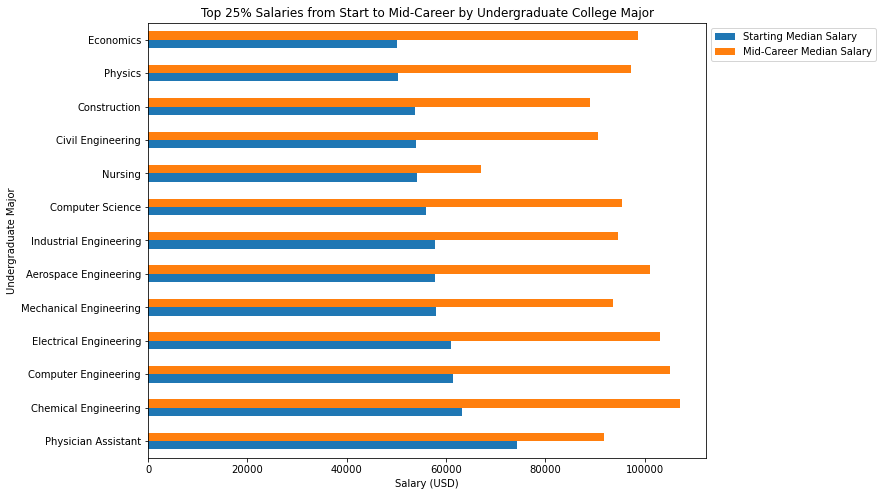

In [443]:
#Barplot of top 25% showing change between starting salary and mid-career salary
salaries=degrees2.plot(x='undergraduate_major', y=['starting_median_salary', 'mid_career_median_salary'], kind="barh", figsize=(10,8))
plt.xlabel('Salary (USD)')
plt.ylabel('Undergraduate Major')
plt.legend(loc='upper left', labels=['Starting Median Salary', 'Mid-Career Median Salary'])
sns.move_legend(salaries, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top 25% Salaries from Start to Mid-Career by Undergraduate College Major');

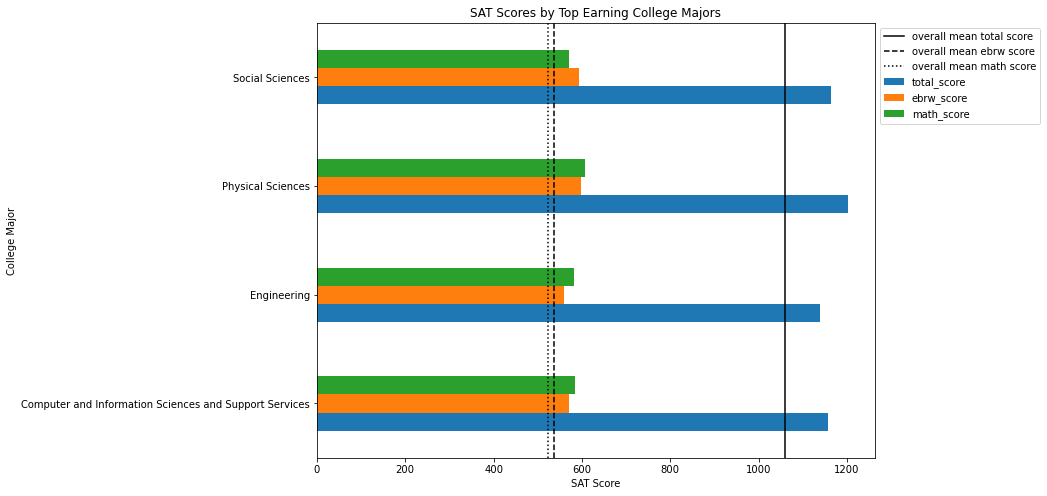

In [382]:
#Barplot of top earning majors showing trends in higher SAT scores 
ax=wanted_majors.plot(y=['total_score', 'ebrw_score', 'math_score'], use_index=True, kind='barh', figsize=(10,8))
plt.legend(loc='upper left', labels=['Total Score', 'EBRW Score', 'Math Score'])
plt.xlabel('SAT Score')
plt.ylabel('College Major')
plt.legend(loc='upper left', labels=['Total Score', 'EBRW Score', 'Math Score'])
plt.axvline(x=1058.50, c='black', label='overall mean total score')
plt.axvline(x=535.50, c='black',linestyle= '--',label='overall mean ebrw score')
plt.axvline(x=523.00, c='black',linestyle= ':', label='overall mean math score')
plt.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('SAT Scores by Top Earning College Majors');

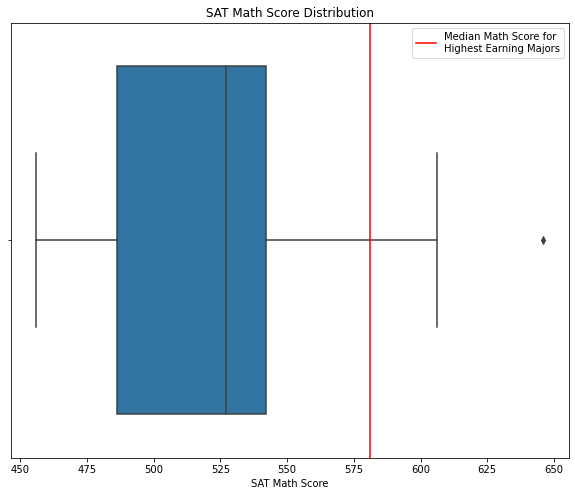

In [451]:
#Boxplot of math scores to show distribution 
plt.figure(figsize=(10,8))
sns.boxplot(data=sat19_major, x='math_score')
plt.axvline(x=581, c='red', label='''Median Math Score for
Highest Earning Majors''')
plt.title('SAT Math Score Distribution')
plt.xlabel('SAT Math Score')
plt.legend();

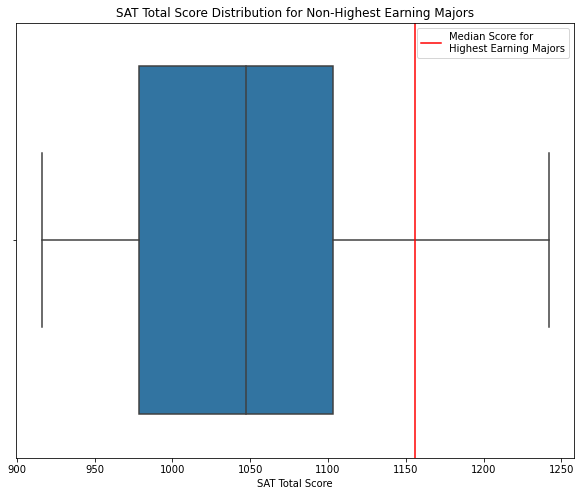

In [420]:
#Boxplot of non-highest earning majors total score distribution with marker of how highest earning majors compare 
plt.figure(figsize=(10,8))
sns.boxplot(data=other_majors, x='total_score')
plt.axvline(x=1156, c='red', label='''Median Score for
Highest Earning Majors''')
plt.title('SAT Total Score Distribution for Non-Highest Earning Majors')
plt.xlabel('SAT Total Score')
plt.legend();

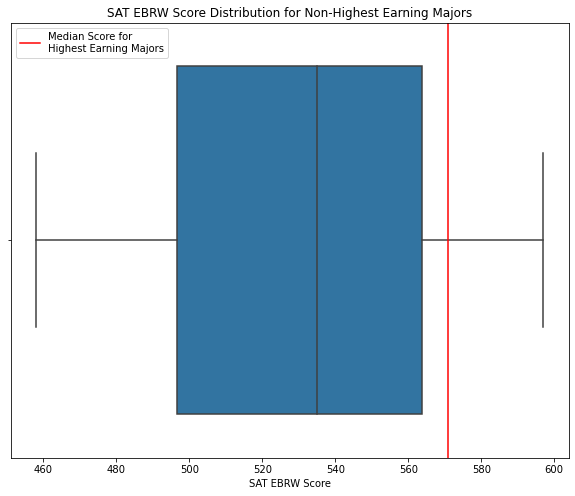

In [421]:
#Boxplot of non-highest earning majors ebrw score distribution with marker of how highest earning majors compare 
plt.figure(figsize=(10,8))
sns.boxplot(data=other_majors, x='ebrw_score')
plt.axvline(x=571, c='red', label='''Median Score for
Highest Earning Majors''')
plt.title('SAT EBRW Score Distribution for Non-Highest Earning Majors')
plt.xlabel('SAT EBRW Score')
plt.legend(loc='upper left');

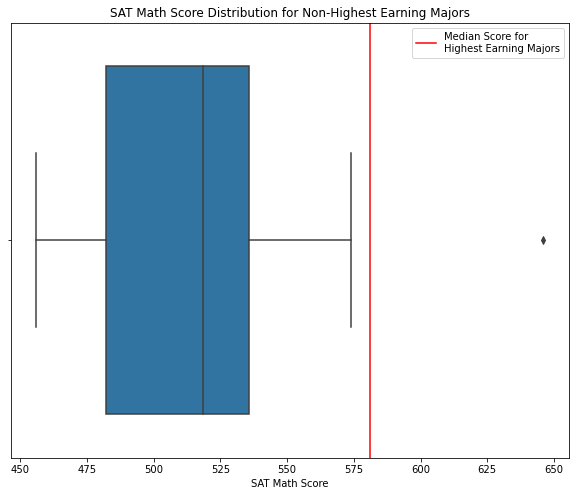

In [422]:
#Boxplot of non-highest earning majors math score distribution with marker of how highest earning majors compare 
plt.figure(figsize=(10,8))
sns.boxplot(data=other_majors, x='math_score')
plt.axvline(x=581, c='red', label='''Median Score for
Highest Earning Majors''')
plt.title('SAT Math Score Distribution for Non-Highest Earning Majors')
plt.xlabel('SAT Math Score')
plt.legend(loc='upper right');

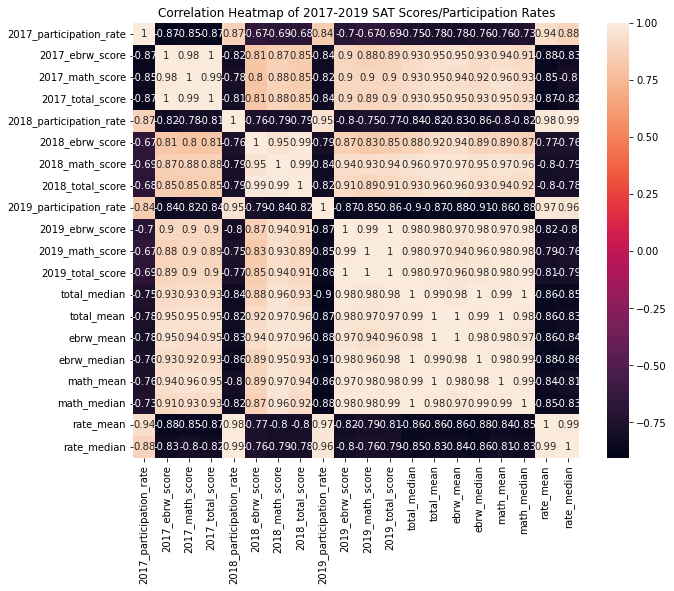

In [423]:
#Heatmap to show correlation between participation rates and test scores 
plt.figure(figsize=(10,8))
sns.heatmap(data=total_sat.corr(), annot=True)
plt.title('Correlation Heatmap of 2017-2019 SAT Scores/Participation Rates');

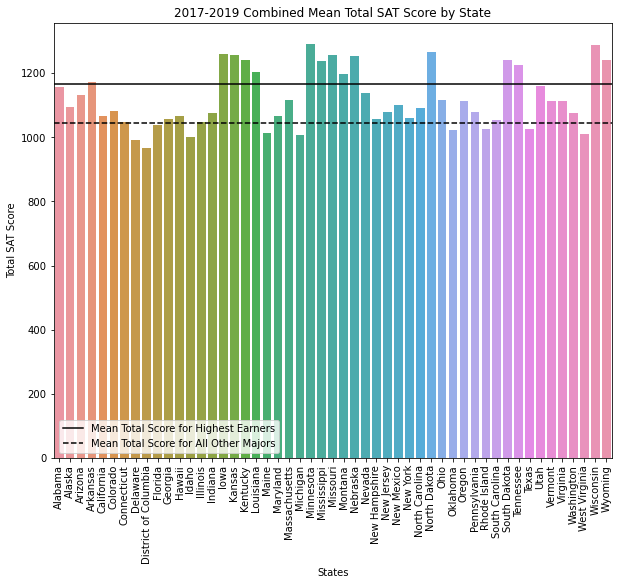

In [437]:
#Bar plot to show average total scores by state over time (2017-2019)
plt.figure(figsize=(10,8))
sns.barplot(x='states', y='total_mean', data=total_sat)
plt.xticks(rotation=90)
plt.axhline(y=1165, color='black', label='Mean Total Score for Highest Earners')
plt.axhline(y=1045.91, color='black', linestyle= '--', label='Mean Total Score for All Other Majors')
plt.ylabel('Total SAT Score')
plt.xlabel('States')
plt.title('2017-2019 Combined Mean Total SAT Score by State')
plt.legend(loc='lower left');

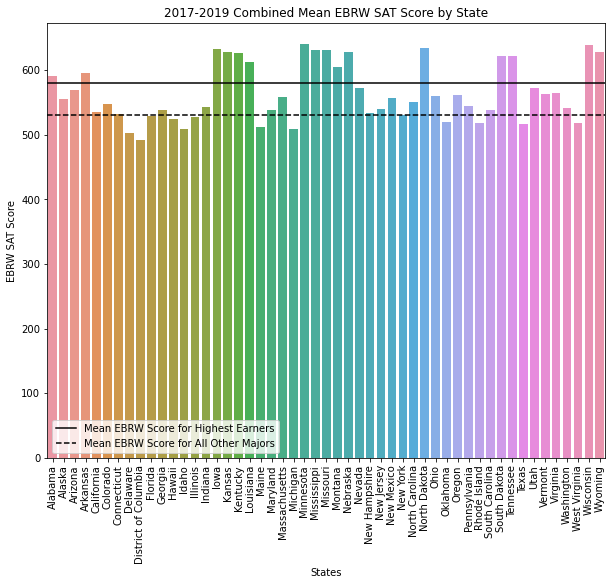

In [398]:
#Bar plot to show average ebrw scores by state over time (2017-2019)
plt.figure(figsize=(10,8))
sns.barplot(x='states', y='ebrw_mean', data=total_sat)
plt.xticks(rotation=90)
plt.axhline(y=580.25, color='black', label='Mean EBRW Score for Highest Earners')
plt.axhline(y=530.24, color='black', linestyle= '--', label='Mean EBRW Score for All Other Majors')
plt.ylabel('EBRW SAT Score')
plt.xlabel('States')
plt.title('2017-2019 Combined Mean EBRW SAT Score by State')
plt.legend(loc='lower left');

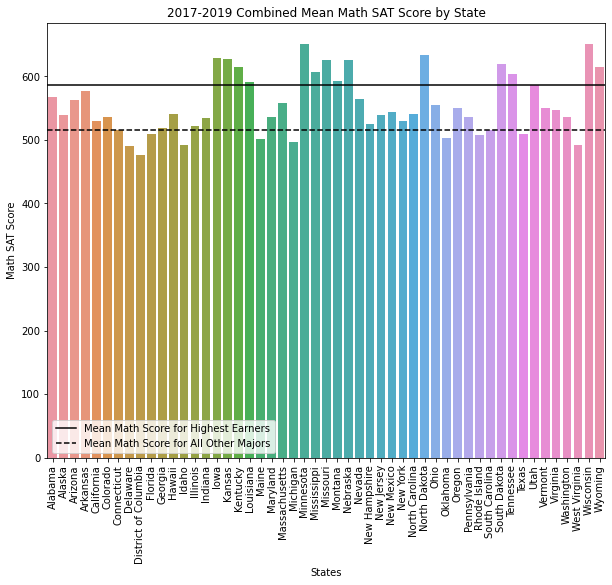

In [397]:
#Bar plot to show average math scores by state over time (2017-2019)
plt.figure(figsize=(10,8))
sns.barplot(x='states', y='math_mean', data=total_sat)
plt.xticks(rotation=90)
plt.axhline(y=585.50, color='black', label='Mean Math Score for Highest Earners')
plt.axhline(y=515.64, color='black', linestyle= '--', label='Mean Math Score for All Other Majors')
plt.ylabel('Math SAT Score')
plt.xlabel('States')
plt.title('2017-2019 Combined Mean Math SAT Score by State')
plt.legend(loc='lower left');

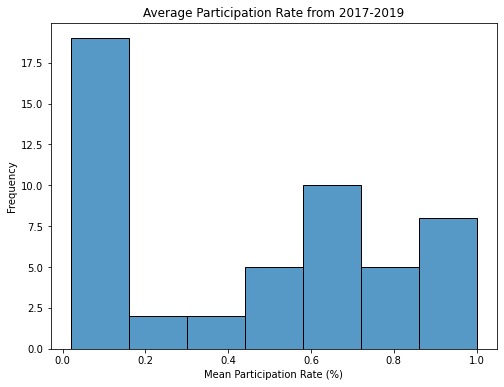

In [415]:
#Histogram of average participation rate distribution over time (2017-2019)
plt.figure(figsize=(8,6))
sns.histplot(data=total_sat, x='rate_mean')
plt.xlabel('Mean Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Average Participation Rate from 2017-2019');

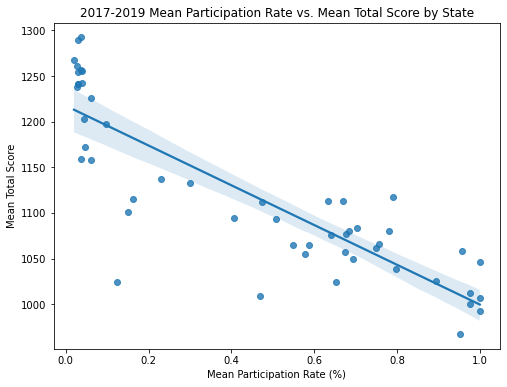

In [440]:
#Scatterplot of average participation rate and average total score over time (2017-2019)
plt.figure(figsize=(8,6))
sns.regplot(x='rate_mean', y='total_mean', data=total_sat)
plt.xlabel('Mean Participation Rate (%)')
plt.ylabel('Mean Total Score')
plt.title('2017-2019 Mean Participation Rate vs. Mean Total Score by State');

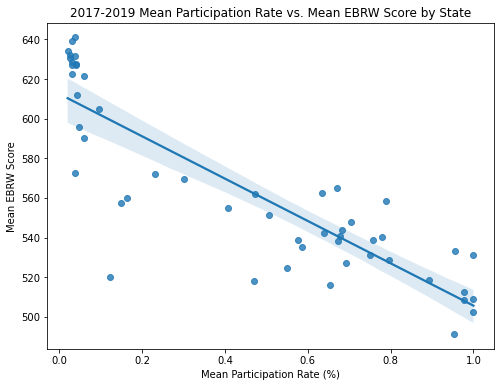

In [439]:
#Scatterplot of average participation rate and average ebrw score over time (2017-2019)
plt.figure(figsize=(8,6))
sns.regplot(x='rate_mean', y='ebrw_mean', data=total_sat)
plt.xlabel('Mean Participation Rate (%)')
plt.ylabel('Mean EBRW Score')
plt.title('2017-2019 Mean Participation Rate vs. Mean EBRW Score by State');

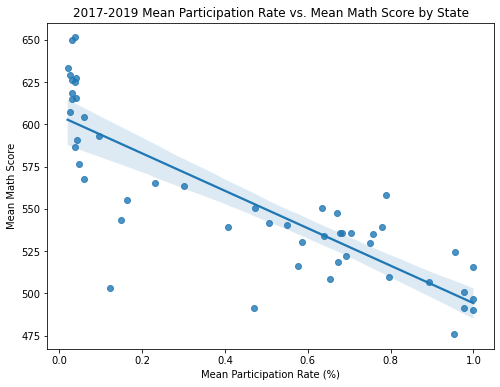

In [441]:
#Scatterplot of average participation rate and average total score over time (2017-2019)
plt.figure(figsize=(8,6))
sns.regplot(x='rate_mean', y='math_mean', data=total_sat)
plt.xlabel('Mean Participation Rate (%)')
plt.ylabel('Mean Math Score')
plt.title('2017-2019 Mean Participation Rate vs. Mean Math Score by State');

## Conclusions and Recommendations 

---
From the above analysis, the key takeaways are:
- The highest earning majors are Engineering, Computer Science, Physics and Economics 
- Those who intend to pursue these majors tend to score higher on all portions of the SAT than those who do not
- The SAT math section has the largest score difference between the highest earning majors and all other majors 
- The states that had favorable Total, EBRW and Math SAT scores were consistent across 2017-2019
- Participation rates are negatively correlated with test scores

Based on the analysis above, it is recommended that funding and scholarships be allocated to the Engineering, Computer Science, Physics and Economics departments, as these are the most lucrative undergraduate majors. Students who intend to pursue one of the above degrees score on average 6-8% higher in all areas of the SAT, with the biggest discrepancy being math. While there are key states to recruit that have favorable test scores (Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, North Dakota, South Dakota, Tennessee, Wisconsin and Wyoming), this data fails to provide an accurate representation of high performing students among states with higher participation rates. More data would be required to make fair recruitment recommendations. Finally, it is recommended that to grow the above programs, a portion of the department funding goes toward programs that give high-school students access to math education, as this is a barrier of entry for pursuing one of the highest earning degrees.

---